In [39]:
import pandas as pd
from datetime import datetime 
df = pd.read_excel("TransactionHistory-3_mon.xls")
df.columns = df.columns.str.replace(" ","_")
drop_columns = ['S_No.','Value_Date','Transaction_Remarks']
df.drop(drop_columns,axis = 1, inplace=True)
df.rename({'Transaction_Date':'TxDate','Withdrawal_Amount_(INR_)':'WDrawAmt','Deposit_Amount_(INR_)':'DepAmt','Balance_(INR_)':'Balance'}, axis = 1, inplace=True)
df.dropna()
df = df[~df['WDrawAmt'].isnull()]
df['WDrawAmt'] = df['WDrawAmt'].apply(lambda x:int(x))
df['DepAmt'] = df['DepAmt'].apply(lambda x:int(x))
df['TxDate'] = df['TxDate'].apply(lambda x:'{:%d-%m}'.format(datetime.strptime(x, "%d/%m/%Y")))
df.head()

,TxDate,WDrawAmt,DepAmt,Balance
0,02-04,2000,0,87129.19
1,02-04,0,2000,89129.19
2,02-04,2000,0,87129.19
3,02-04,0,2000,89129.19
4,02-04,5000,0,84129.19


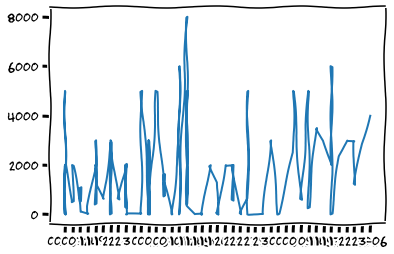

In [40]:
from matplotlib import pyplot as plt
plt.xkcd();
plt.plot(df['TxDate'],df['WDrawAmt'],label = 'Date vs WithDraw Amt')